In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns


NameError: name 'linkage_matrix' is not defined

In [3]:
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')

In [4]:
df['region_num'] = df['customer_region'].astype('category').cat.codes
df['payment_method_num'] = df['payment_method'].astype('category').cat.codes
df['last_promo_binary'] = (df['last_promo'].notnull()).astype(int)

In [7]:
numerical_features = [
    'customer_age', 
    'vendor_count', 
    'product_count', 
    'region_num', 
    'payment_method_num', 
    'last_promo_binary', 
    'first_order', 
    'last_order'
]

df_numerical = df[numerical_features]


In [8]:
def hierarchical_clustering(data, n_clusters=3, linkage_method='ward'):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data)
    
    linkage_matrix = linkage(X_scaled, method=linkage_method)
    
    # Plotar o dendrograma
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, truncate_mode='level', p=5)
    plt.title(f'Dendrograma')
    plt.xlabel('Índices das Amostras')
    plt.ylabel('Distância')
    plt.show()
    
    # Criar clusters
    hc_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage=linkage_method)
    data['Cluster'] = hc_model.fit_predict(X_scaled)
    
    # Calcular Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, data['Cluster'])
    print(f"Silhouette Score: {silhouette_avg:.2f}")
    
    # Resumo por cluster
    cluster_summary = data.groupby('Cluster').mean()
    print(cluster_summary)
    
    # Visualizar os clusters
    sns.pairplot(data, vars=data.columns[:-1], hue='Cluster', palette='Set2', height=2)
    plt.show()


Valores inválidos por coluna:
customer_age          0
vendor_count          0
product_count         0
region_num            0
payment_method_num    0
last_promo_binary     0
first_order           0
last_order            0
dtype: int64


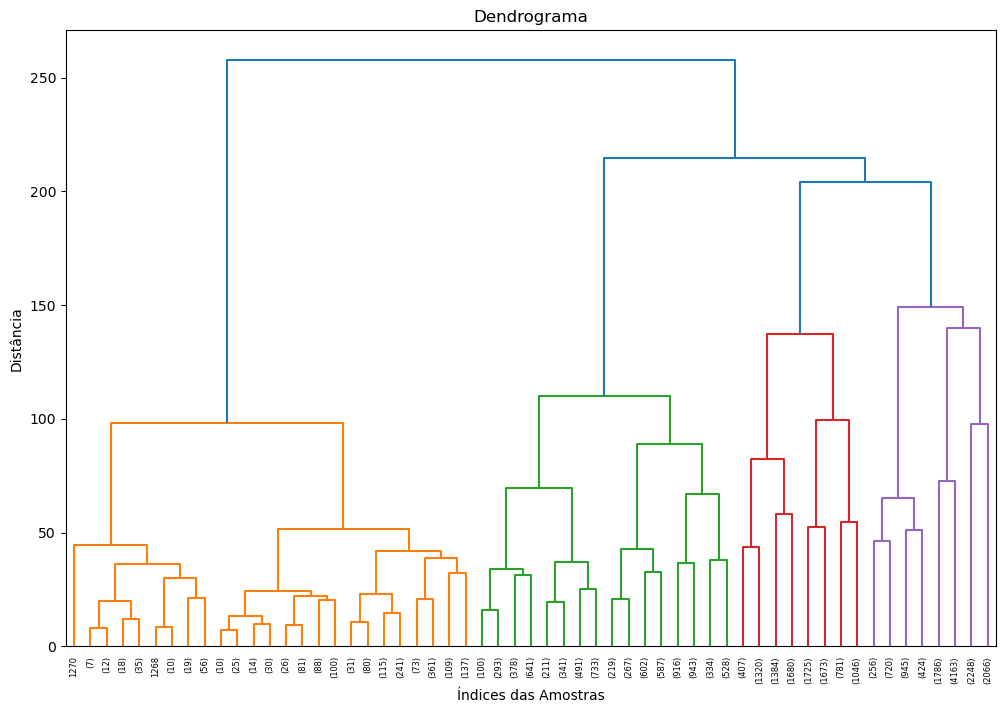

Silhouette Score: 0.14
         customer_age  vendor_count  product_count  region_num  \
Cluster                                                          
0           27.612267      2.987535       5.196871    4.852855   
1           27.217417     11.044048      26.271429    3.646429   
2           27.255014      1.686709       2.510417    3.907041   

         payment_method_num  last_promo_binary  first_order  last_order  
Cluster                                                                  
0                  0.574390                1.0    33.083073   73.068379  
1                  0.231548                1.0     7.367262   83.564881  
2                  0.585970                1.0    19.419475   31.249604  


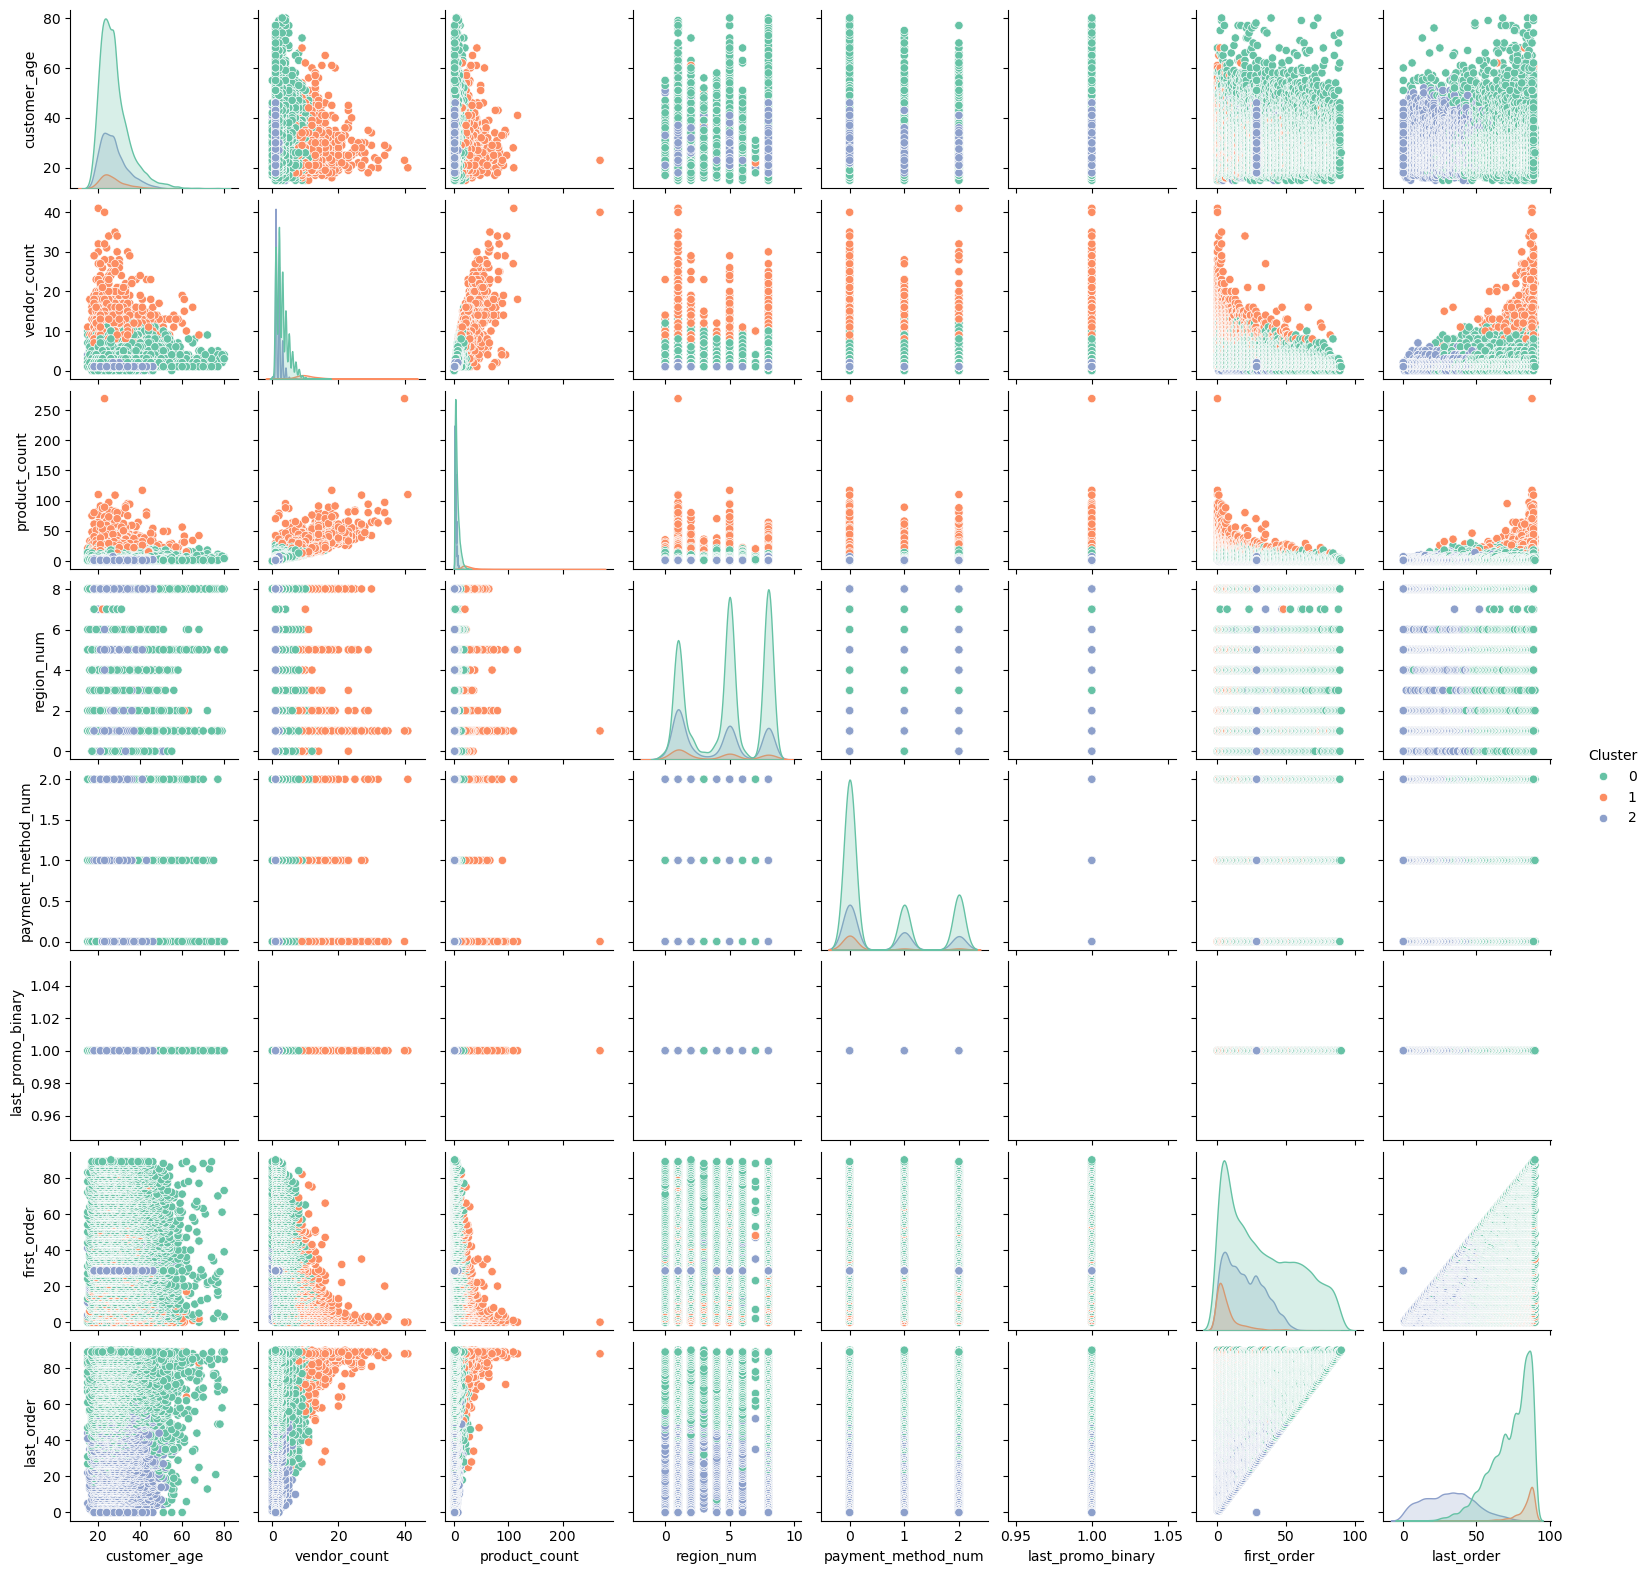

In [9]:
# Verificar e corrigir valores inválidos
df_numerical = df_numerical.fillna(df_numerical.mean())  # Substituir valores NaN pela média
df_numerical = df_numerical.replace([np.inf, -np.inf], np.nan).fillna(df_numerical.mean())  # Tratar infinitos

# Confirmar que não há valores inválidos
print("Valores inválidos por coluna:")
print(df_numerical.isnull().sum())

# Realizar o clustering
hierarchical_clustering(df_numerical, n_clusters=3)


In [ ]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(linkage_matrix, t=150, criterion='distance')
df['Cluster'] = clusters


In [ ]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)
